In [2]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd

In [13]:
files = glob.glob('Z:/giocomo/attialex/speed_sort4/*.mat')

# I think this is where I find for each session the baseline trials, take top and bottom trials in terms of speed

In [18]:

ii=0
for iF in files:
    try:
        dat = lm.loadmat(iF)

        if ii>0:
            delays = np.concatenate((delays,dat['data']['delay']),1)
            region = np.concatenate((region,dat['data']['region']))
        else:
            delays = dat['data']['delay']
            region = dat['data']['region']
        ii=ii+1
    except:
        pass
    

In [15]:
iF

'Z:/giocomo/attialex/speed_sort4\\npJ5_0505_baseline_1.mat'

In [19]:
reg = [str(r) for r in region]
reg = ['RSP' if el.startswith('RS') else el for el in reg]

In [40]:
idx =  [i for i, x in enumerate(reg) if (x == 'MEC' or x=='VISp' or x=='RSP') and delays[1,i]>0.4 and np.abs(delays[0,i])<20 ]
rr =  [x for i, x in enumerate(reg) if (x == 'MEC' or x=='VISp' or x=='RSP') and delays[1,i]>0.4 and np.abs(delays[0,i])<20]

In [41]:
dataset = pd.DataFrame({'region': rr,'shift':delays[0,idx]})

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 1.000e+00, 4.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 1.400e+01, 1.400e+01, 1.200e+01,
        1.400e+01, 1.100e+01, 1.400e+01, 1.900e+01, 1.400e+01, 1.700e+01,
        2.600e+01, 3.700e+01, 3.600e+01, 3.900e+01, 5.100e+01, 4.900e+01,
        6.600e+01, 6.700e+01, 8.400e+01, 1.100e+02, 8.400e+01, 1.100e+02,
        1.250e+02, 1.530e+02, 1.680e+02, 1.490e+02, 1.990e+02, 1.980e+02,
        2.110e+02, 2.580e+02, 2.500e+02, 2.780e+02, 2.770e+02, 3.420e+02,
        3.380e+02, 3.430e+02, 3.550e+02, 4.090e+02, 4.070e+02, 4.060e+02,
        4.440e+02, 4.550e+02, 5.000e+02, 5.140e+02, 5.380e+02, 4.980e+02,
        5.200e+02, 5.950e+02, 5.760e+02, 5.520e+02, 5.580e+02, 6.000e+02,
        5.970e+02, 6.220e+02, 6.550e+02, 6.880e+02, 6.810e+02, 7.080e+02,
        6.970e+02, 6.810e+02, 7.090e+02, 6.930e+02, 7.490e+02, 7.530e+02,
        7.420e+02, 7.760e+02, 8.060e+0

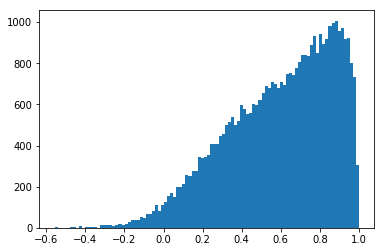

In [33]:
import matplotlib.pyplot as plt
plt.hist(delays[1,:],100)

In [9]:
ax = sns.violinplot(x="region", y="shift", data=dataset, inner=None)
fig = ax.get_figure()
#fig.savefig('C:/temp/violin_fast_slow.png')
#ax = sns.swarmplot(x="region", y="shift", data=dataset)

NameError: name 'dataset' is not defined

In [23]:
unique_elements, counts_elements = np.unique(reg, return_counts=True)
p={a:b for (a,b) in zip(unique_elements,counts_elements)}

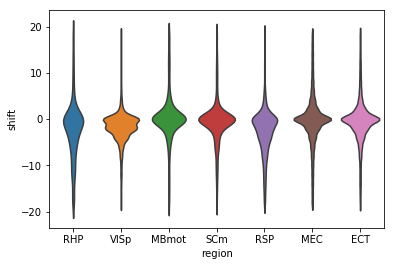

In [39]:
idx =  [i for i, x in enumerate(reg) if p[x] >500 and delays[1,i]>0.2 and np.abs(delays[0,i])<20]
rr =  [x for i, x in enumerate(reg) if p[x] >500 and delays[1,i]>0.2 and np.abs(delays[0,i])<20]
dataset = pd.DataFrame({'region': rr,'shift':delays[0,idx]})
ax = sns.violinplot(x="region", y="shift", data=dataset, inner=None)

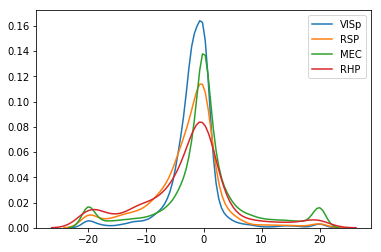

In [26]:
regions =['VISp','RSP','MEC']
for r in regions:
    idx =  [i for i, x in enumerate(reg) if x==r and delays[1,i]>0.1]
    ax=sns.kdeplot(delays[0,idx],label=r)
fig = ax.get_figure()
fig.savefig('C:/temp/kde_fast_slow.png')

# plot maps

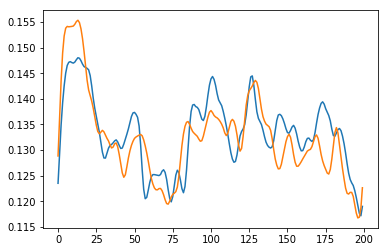

In [57]:
plt.plot(dat['data']['slow_trials'].mean(axis=1))
plt.plot(dat['data']['fast_trials'].mean(axis=1))


In [121]:
tmp_dat = delays[:,idx].mean(axis=1)
d=dat['data']['fast']-dat['data']['slow']*np.ones(1,)

tmp_dat=np.concatenate((tmp_dat,d))

In [131]:
ii=0
DATA={}
for iF in files:

    dat = lm.loadmat(iF)
    region = [str(i) for i in dat['data']['region']]
    reg=np.unique(region)
    delays = dat['data']['delay']
    for r in reg:
        idx = np.logical_and(dat['data']['region']==r,np.logical_and(delays[1,:]>.2, np.abs(delays[0,:])<20))
        tmp_dat = np.nanmean(delays[:,idx],axis=1)
        d=dat['data']['fast']-dat['data']['slow']*np.ones(1,)
        tmp_dat=np.concatenate((tmp_dat,d))
        if r in DATA:
            tmp = DATA[r]
            tmp = np.vstack((tmp,tmp_dat))
            DATA[r]=tmp
        else:
            DATA[r]=tmp_dat



C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


ValueError: Did not fully consume compressed contents of an miCOMPRESSED element. This can indicate that the .mat file is corrupted.

[[ 1.         -0.06824331]
 [-0.06824331  1.        ]]
[[ 1.        -0.0688466]
 [-0.0688466  1.       ]]


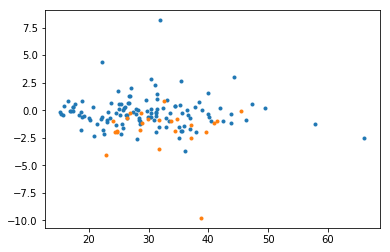

In [144]:
for k in ['MEC','VISp']:
    v=DATA[k]
    valid_idx = np.logical_not(np.any(np.isnan(v),axis=1))
    a=np.corrcoef(v[valid_idx,2],v[valid_idx,0])
    print(a)
    plt.plot(v[valid_idx,2],v[valid_idx,0],'.')

# average xcorrs, calculated across whole track

In [3]:
files = glob.glob('Z:/giocomo/attialex/speed_sort6/*.mat')
ii=0
DATA={}
XCORRS = {}
for iF in files:

    dat = lm.loadmat(iF)
    region = [str(i) for i in dat['data_out']['region']]
    reg=np.unique(region)
    delays = dat['data_out']['delay']
    for r in reg:
        if r.startswith('RS'):
            r='RSP'
        idx = np.logical_and(np.char.startswith(region,r),np.logical_and(delays[1,:]>.4, np.abs(delays[0,:])<20))
        if idx.sum()>2:
            tmp_dat = np.nanmean(delays[:,idx],axis=1)
            d=dat['data_out']['fast']-dat['data_out']['slow']*np.ones(1,)
            tmp_dat=np.concatenate((tmp_dat,d))
            tmp_x = np.nanmean(dat['data_out']['XCORR'][idx,:],axis = 0)
            if r in DATA:
                tmp = DATA[r]
                tmp = np.vstack((tmp,tmp_dat))
                DATA[r]=tmp
                tmp = XCORRS[r]
                tmp = np.vstack((tmp,tmp_x))
                XCORRS[r]=tmp
            else:
                DATA[r]=tmp_dat
                XCORRS[r]=tmp_x
        else:
            pass

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


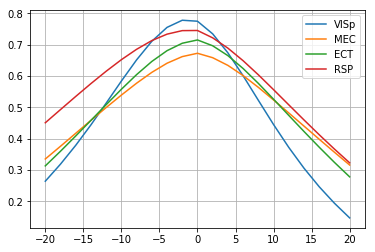

In [92]:
regs = ['VISp','MEC','ECT','RSP']

for r in regs:
    plt.plot(np.arange(-10,11)*2,XCORRS[r].mean(axis=0),label=r)
    
plt.grid()
plt.legend()


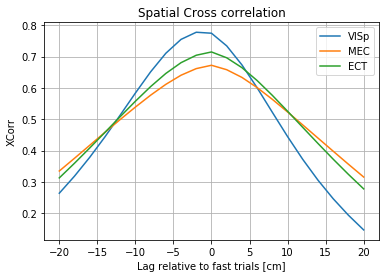

In [8]:
import matplotlib.pyplot as plt
regs = ['VISp','MEC','ECT']

for r in regs:
    plt.plot(np.arange(-10,11)*2,XCORRS[r].mean(axis=0),label=r)
    
plt.grid()
plt.legend()
plt.title('Spatial Cross correlation')
plt.ylabel('XCorr')
plt.xlabel('Lag relative to fast trials [cm]')
plt.savefig('F:/temp/xcorr_speed.png')


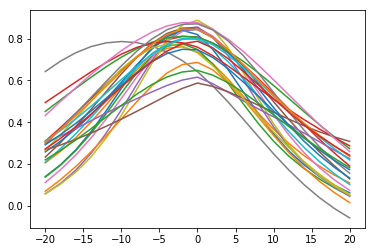

In [94]:
plt.plot(np.arange(-10,11)*2,XCORRS['VISp'].transpose())

# same as above, but for first third of track, looks much worse

In [86]:
files = glob.glob('Z:/giocomo/attialex/speed_sort7/*.mat')
ii=0
DATA={}
XCORRS = {}
for iF in files:

    dat = lm.loadmat(iF)
    region = [str(i) for i in dat['data_out']['region']]
    reg=np.unique(region)
    delays = dat['data_out']['delay']
    for r in reg:
        if r.startswith('RS'):
            r='RSP'
        idx = np.logical_and(np.char.startswith(region,r),np.logical_and(delays[1,:]>.2, np.abs(delays[0,:])<20))
        if idx.sum()>2:
            tmp_dat = np.nanmean(delays[:,idx],axis=1)
            d=dat['data_out']['fast']-dat['data_out']['slow']*np.ones(1,)
            tmp_dat=np.concatenate((tmp_dat,d))
            tmp_x = np.nanmean(dat['data_out']['XCORR'][idx,:],axis = 0)
            if r in DATA:
                tmp = DATA[r]
                tmp = np.vstack((tmp,tmp_dat))
                DATA[r]=tmp
                tmp = XCORRS[r]
                tmp = np.vstack((tmp,tmp_x))
                XCORRS[r]=tmp
            else:
                DATA[r]=tmp_dat
                XCORRS[r]=tmp_x
        else:
            pass

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


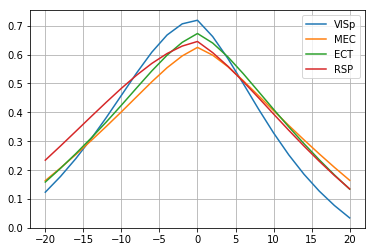

In [87]:
regs = ['VISp','MEC','ECT','RSP']

for r in regs:
    plt.plot(np.arange(-10,11)*2,XCORRS[r].mean(axis=0),label=r)
    
plt.grid()
plt.legend()